**Proyek Mini: Analisis Data Restoran**

**menerapkan visualization a categorical and a quantitave variable**

**Tujuan**

**Anda adalah seorang ilmuwan data yang diberi tugas untuk menganalisis dataset tips (yang digunakan dalam materi) untuk menemukan wawasan bagi pemilik restoran.**

---

**Import Dataset**


In [1]:
# using default dataset from seaborn

import seaborn as sns
tips_df = sns.load_dataset('tips')

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

**1. Eksplorasi Ukuran Rombongan (Size):**

- Buat count plot untuk melihat ukuran rombongan yang paling umum datang ke restoran.
- Apakah ada ukuran rombongan tertentu yang jauh lebih sering muncul daripada yang lain?


Rata-rata total rombongan yang mengunjungi restoran


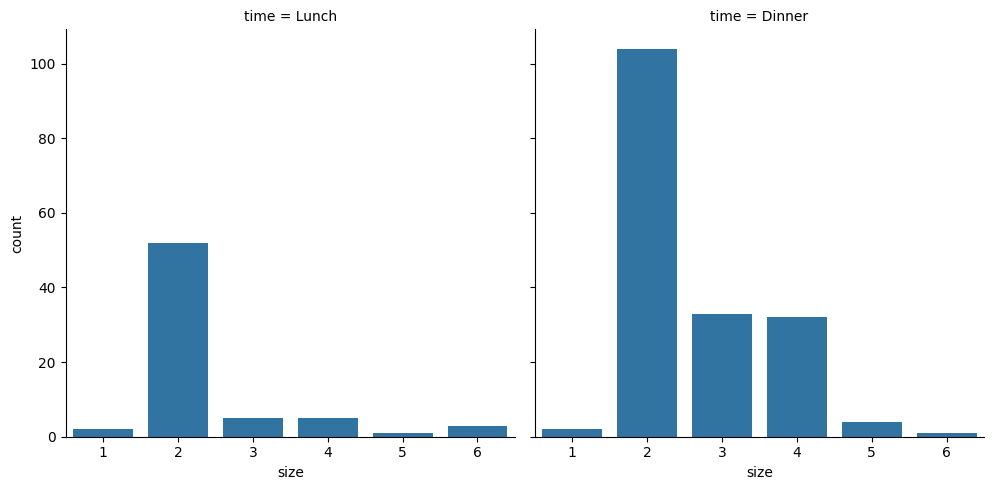

In [39]:
import matplotlib.pyplot as plt

# sns.countplot(x="size",
#               data=tips_df) 

# plt.title('Rata-rata total rombongan yang mengunjungi restoran')
# plt.xlabel('Rombongan')
# plt.ylabel('Total Rombongan')
# plt.show() 

##additional
sns.catplot(
    x="size",
    col="time",
    data=tips_df,
    kind="count",   # catplot dengan countplot
    height=5,
    aspect=1
)

print('Rata-rata total rombongan yang mengunjungi restoran')


plt.show()

**rata-rata rombongan yang sering muncul adalah 2 orang ini bisa mengindikasikan oleh banyak nya pasangan couple lebih banyak mengunjungi restoran, dimana size tersebut tepat lebih banyak pada saat dinner**

----

**2. Analisis Tip Berdasarkan Hari:**

- Buat bar plot yang menunjukkan rata-rata tip yang diberikan untuk setiap day (hari).
- Hari apa yang memiliki rata-rata tip tertinggi? Apakah interval kepercayaannya tumpang tindih secara signifikan dengan hari-hari lain?

    day       tip
3   Sun  3.255132
2   Sat  2.993103
0  Thur  2.771452
1   Fri  2.734737
Hari dengan rata-rata tip tertinggi: Sun (3.26)


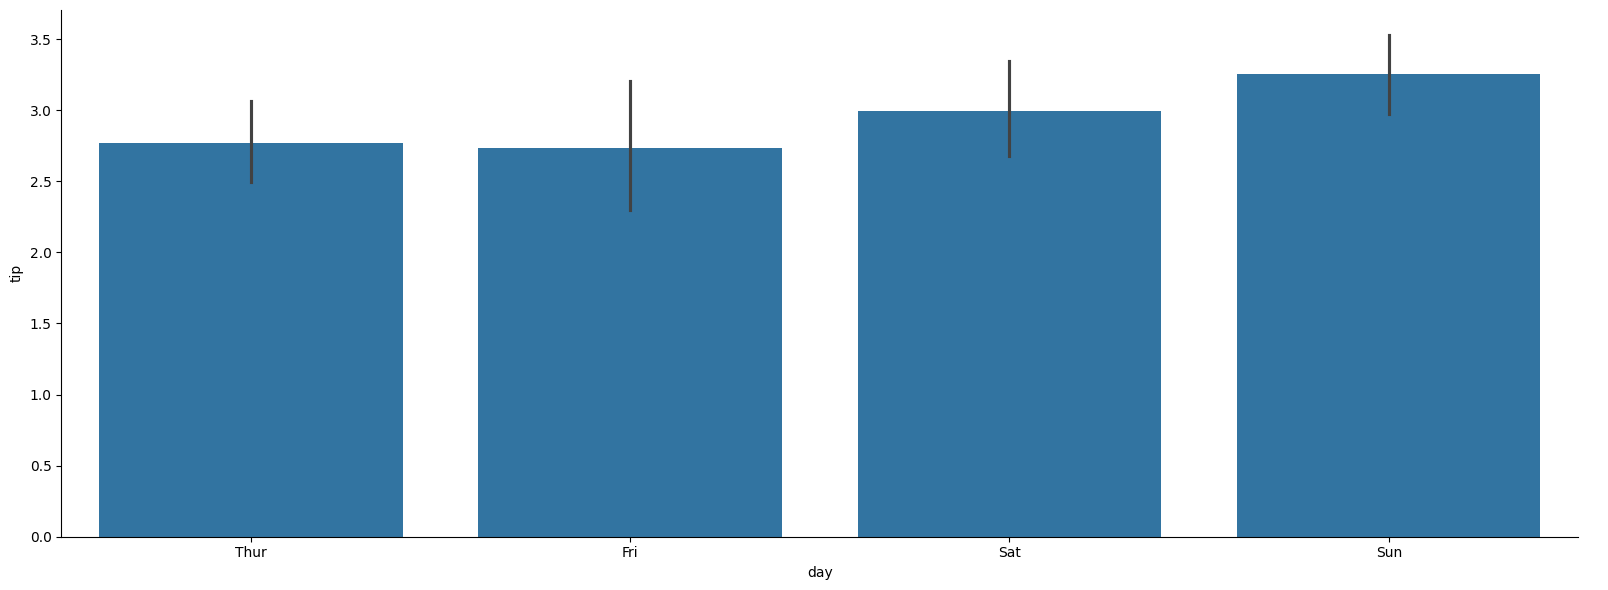

In [30]:
import pandas as pd

# hitung rata-rata tip per day
avg_tips = tips_df.groupby("day", as_index=False, observed=True)["tip"].mean().sort_values(['tip'], ascending=False)

print(avg_tips)

# hari dengan rata-rata tertinggi
max_day = avg_tips.loc[avg_tips["tip"].idxmax()]
print(f"Hari dengan rata-rata tip tertinggi: {max_day['day']} ({max_day['tip']:.2f})")

#########
import numpy as np

sns.catplot(x='day',
            y='tip',
            data=tips_df,
            kind='bar',
            estimator=np.mean, # eksplisit
            errorbar=('ci', 95),  # default, interval kepercayaan 95%
            height=6,
            aspect=16/6)

plt.show()






**Tips dengan rata-rata tertinggin ada pada hari minggu disebakan karna hari libur dimana potensi pengunjung lebih banyak sementara jumat adalah hari pendek jadi lebih sedikit meski begitu**

**Secara visual, perbedaan rata-rata tip antar hari ada, tapi secara statistik kemungkinan besar tidak signifikan karena semua CI tumpang tindih.**

---

**2. Distribusi Total Tagihan (Total Bill) per Waktu Makan:**

- Buat box plot untuk membandingkan distribusi total_bill antara time (Lunch vs. Dinner).
- Apakah ada perbedaan signifikan dalam jumlah tagihan antara makan siang dan makan malam? Apakah ada banyak outlier pada salah satu waktu makan? Buat plot kedua tanpa outlier untuk perbandingan.

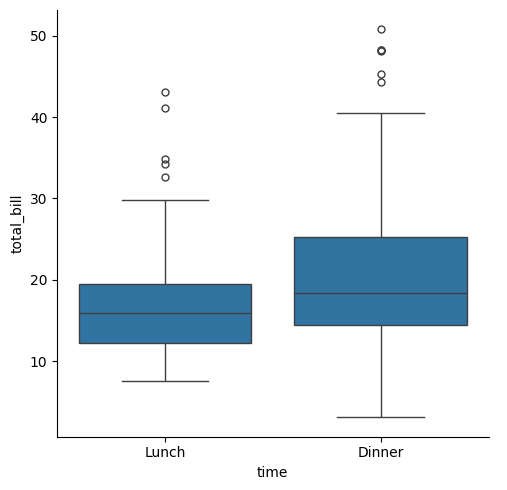

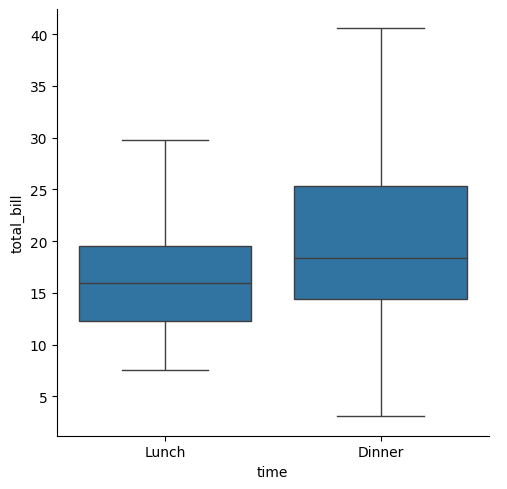

In [42]:
g = sns.catplot(x="time",                  
                y="total_bill",                 
                data=tips_df,                  
                kind="box")   

plt.show() 

a = sns.catplot(x="time",                  
                y="total_bill",                 
                data=tips_df,                  
                kind="box",
                showfliers=False)   
plt.show()

**ada perbedaan signifikan antara lunch dan dinner dimana cendrung memiliki total tagihan bill lebih besar ini bisa jadi karna lebih banyak pengunjung atau bisa jadi harga tagihan dinner berbeda dengan lunch**

**untuk outlier sendiri tergantung konteks bisa di hapus ataupun bisa dibiarkan saja jika ingin melihat perilaku asli cukup biarkan tetapi apabila kita ingin membuat model prediksi harus dihapus**

---

**4. Hubungan Antara Merokok, Hari, dan Total Tagihan:**

- Buat point plot untuk mengeksplorasi bagaimana rata-rata total_bill bervariasi berdasarkan day, dengan memisahkan antara smoker (perokok) dan non-perokok (gunakan parameter hue).
- Apakah ada tren yang menarik? Misalnya, apakah perokok cenderung menghabiskan lebih banyak pada hari-hari tertentu dibandingkan non-perokok?

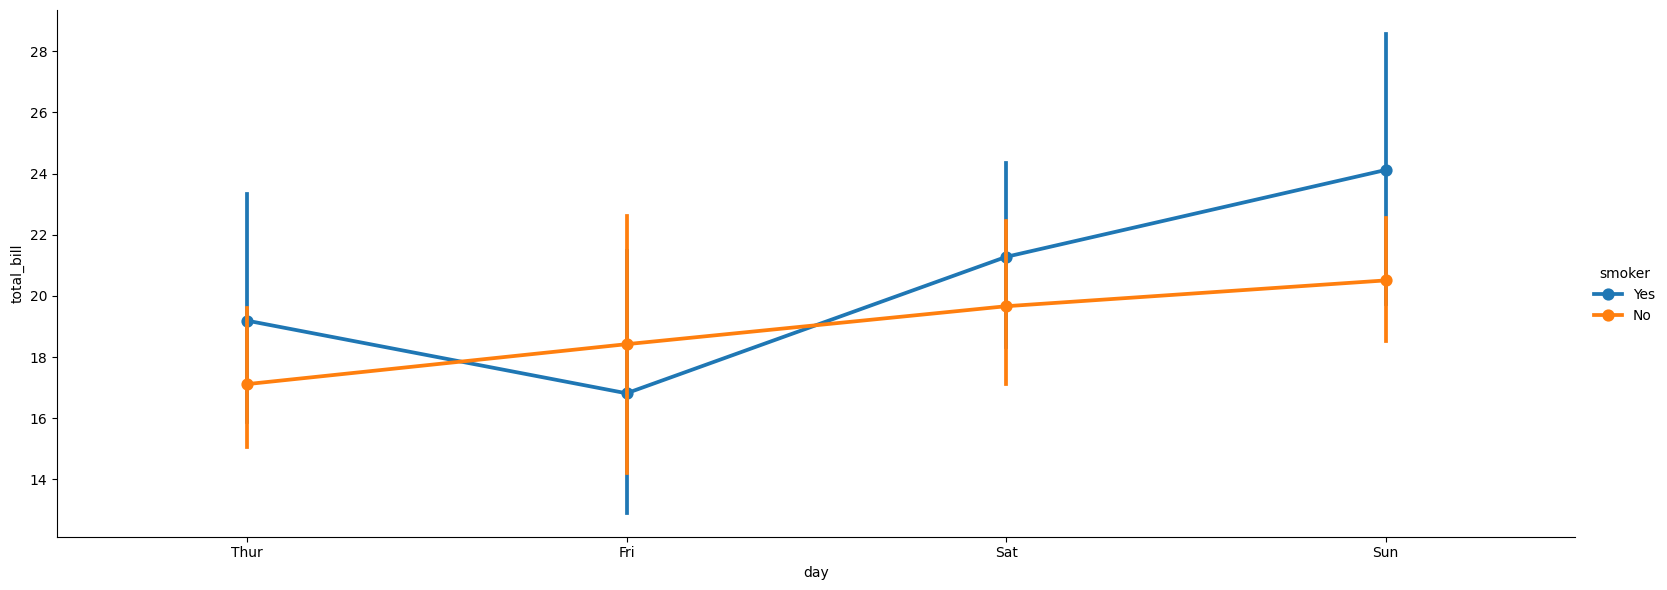

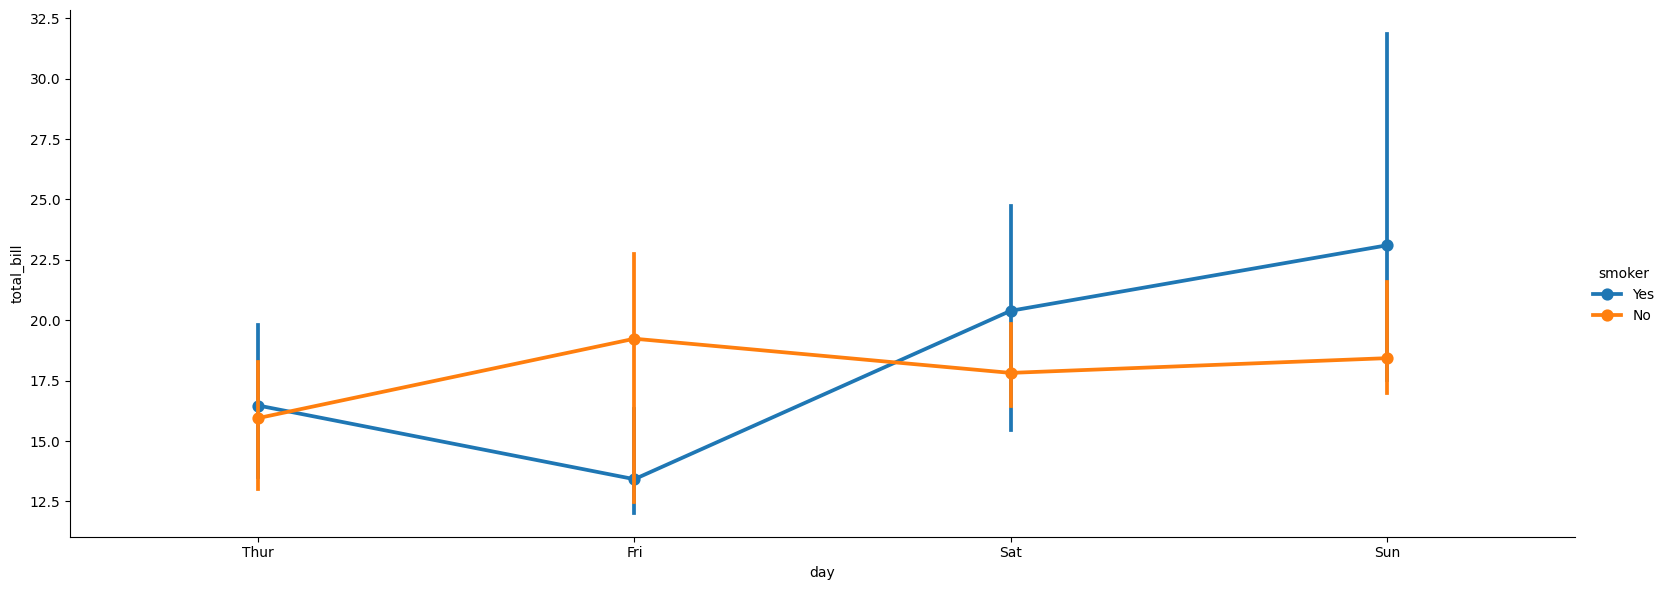

In [47]:
sns.catplot(x="day",              
            y="total_bill",              
            data=tips_df,             
            hue="smoker",             
            kind="point",
            height=6,
            aspect=16/6,) 

plt.show() 




######## bonus
from numpy import median 

sns.catplot(x="day",              
            y="total_bill",              
            data=tips_df,             
            hue="smoker",             
            kind="point",
            height=6,
            aspect=16/6,
            estimator=median) 

plt.show() 


**Tren visual: perokok di hari Minggu lebih banyak menghabiskan total bill.**

**Signifikansi statistik: apakah ada perbedaan signifikan total bill antara perokok dan non-perokok? perlu diuji lagi (misalnya dengan t-test antara kelompok smoker vs non-smoker pada hari Minggu).**

In [46]:
#additonal uji t-test
from scipy import stats

# filter hanya hari Minggu
sunday_data = tips_df[tips_df["day"] == "Sun"]

# pisahkan smoker dan non-smoker
smoker = sunday_data[sunday_data["smoker"] == "Yes"]["total_bill"]
non_smoker = sunday_data[sunday_data["smoker"] == "No"]["total_bill"]

# uji t-test independent
t_stat, p_val = stats.ttest_ind(smoker, non_smoker, equal_var=False)  # Welch’s t-test

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Perbedaannya signifikan secara statistik (p < 0.05).")
else:
    print("❌ Perbedaannya tidak signifikan (p >= 0.05).")

T-statistic: 1.3756807289294484
P-value: 0.1808055494334942
❌ Perbedaannya tidak signifikan (p >= 0.05).


## Additional

In [48]:
# filter data Sunday & Saturday
sun = tips_df[tips_df["day"] == "Sun"]["total_bill"]
sat = tips_df[tips_df["day"] == "Sat"]["total_bill"]

# uji t-test independent
t_stat, p_val = stats.ttest_ind(sun, sat, equal_var=False)  # Welch’s t-test

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Perbedaannya signifikan secara statistik (p < 0.05).")
else:
    print("❌ Perbedaannya tidak signifikan (p >= 0.05).")

T-statistic: 0.6749545472214844
P-value: 0.500676892195244
❌ Perbedaannya tidak signifikan (p >= 0.05).


In [50]:
# ambil total_bill tiap hari
sun = tips_df[tips_df["day"] == "Sun"]["total_bill"]
sat = tips_df[tips_df["day"] == "Sat"]["total_bill"]
thur = tips_df[tips_df["day"] == "Thur"]["total_bill"]
fri = tips_df[tips_df["day"] == "Fri"]["total_bill"]

# one-way ANOVA
f_stat, p_val = stats.f_oneway(sun, sat, thur, fri)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Ada perbedaan signifikan rata-rata total bill di antara hari-hari tersebut. lanjutkan ke post-hoc test(pairwise comparison)")
else:
    print("❌ Tidak ada perbedaan signifikan.")

F-statistic: 2.7674794432863363
P-value: 0.04245383328951916
✅ Ada perbedaan signifikan rata-rata total bill di antara hari-hari tersebut. lanjutkan ke post-hoc test(pairwise comparison)


In [51]:
##  supaya tahu hari mana dengan hari mana yang beda signifikan
# Biasanya dipakai Tukey’s HSD.

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=tips_df['total_bill'],
                          groups=tips_df['day'],
                          alpha=0.05)

print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4541 -2.4799  9.0595  False
   Fri    Sun   4.2584 0.2371 -1.5856 10.1025  False
   Fri   Thur   0.5312 0.9957 -5.4434  6.5057  False
   Sat    Sun   0.9686 0.8968 -2.6088   4.546  False
   Sat   Thur  -2.7586 0.2374 -6.5455  1.0282  False
   Sun   Thur  -3.7273 0.0668 -7.6264  0.1719  False
----------------------------------------------------


C:\Users\USER\AppData\Local\Temp\ipykernel_35148\911221811.py:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="day",


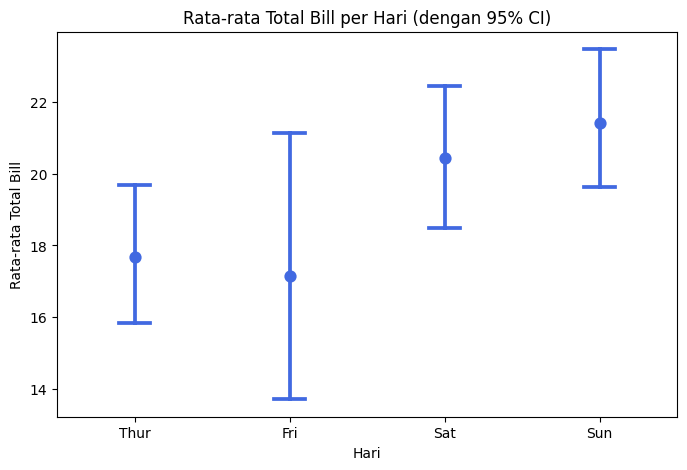

In [58]:
# melihat lagi apakah memang tidak begitu signifikan?


import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.pointplot(x="day", 
              y="total_bill", 
              data=tips_df, 
              errorbar=('ci', 95),   # confidence interval 95%
              linestyle="none", 
              capsize=0.2, 
              join=False, 
              color="royalblue")

plt.title("Rata-rata Total Bill per Hari (dengan 95% CI)")
plt.ylabel("Rata-rata Total Bill")
plt.xlabel("Hari")
plt.show()
